### Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Column 1: age in years
# Column 2: 1 = male, 0 = female
# Column 3: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
# Column 4: resting blood pressure in mmHg
# Column 5: cholesterol in mg/dl
# Column 6: 1 means > 120 mg/dl, 0 means <= 120 mg/dl
# Column 7: resting electrocardiographic, 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
# Column 8: max heart rate achieved
# Column 9: 1 = yes, 2 = no
# Column 10: ST depression induced by exercise relative to rest
# Column 11: slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
# Column 12: number of major vessels (0-3) colored by flourosopy
# Column 13: 3 = normal, 6 = fixed defect, 7 = reversable defect
# Column 14: >=1 means heart disease, 0 = no heart disease

myNames = ["age", # column 1
        "sex", # col 2
        "chestPainType", # col 3
        "restingBP", # col 4
        "serumCholesterol", # col 5
        "fastingBloodSugar", # col 6
        "restingEcg", # col 7
        "maxHeartRate", # col 8
        "exerciseInducedAngina", # col 9
        "stDepression", # col 10
        "stSlope", # col 11
        "majorVessels", # col 12
        "thalassemia", # col 13
        "diagnosis"] # col 14
assert len(myNames) == 14

data=pd.read_csv("data/processed.cleveland.data", sep=',', names=myNames, na_values=["?", '?'])
data = data.dropna() # Drop rows with missing data
data.iloc[:, -1] = data.iloc[:, -1].clip(0, 1) # clip last column (output) between 0 and 1, both inclusive

# Convert all columns to float
for name in myNames:
    data[name] = pd.to_numeric(data[name],errors = 'coerce')

m = data.shape[0] # num examples
n = data.shape[1] - 1 # num features

print("Num features:", n)
print("Num examples:", m)
    
# a few examples from the dataset 
print()
print(data.head())

X = data.values[:, :-1]
y = data.values[:, -1:]



categoricalColumnsNames = ["sex", 
                      "chestPainType", 
                      "fastingBloodSugar", 
                      "restingEcg", 
                      "exerciseInducedAngina", 
                      "stSlope",
                      "majorVessels",
                      "thalassemia"]
continuousColumns = data.drop(categoricalColumnsNames, axis=1)
continuousColumnsNames = [name for name in myNames if name not in categoricalColumnsNames and name != "diagnosis"]
categoricalColumns = data.drop(continuousColumnsNames, axis=1)
if "diagnosis" in continuousColumns:
    continuousColumns = continuousColumns.drop("diagnosis", axis=1)
if "diagnosis" not in categoricalColumns:
    categoricalColumns = data["diagnosis"]


Num features: 13
Num examples: 297

    age  sex  chestPainType  restingBP  serumCholesterol  fastingBloodSugar  \
0  63.0  1.0            1.0      145.0             233.0                1.0   
1  67.0  1.0            4.0      160.0             286.0                0.0   
2  67.0  1.0            4.0      120.0             229.0                0.0   
3  37.0  1.0            3.0      130.0             250.0                0.0   
4  41.0  0.0            2.0      130.0             204.0                0.0   

   restingEcg  maxHeartRate  exerciseInducedAngina  stDepression  stSlope  \
0         2.0         150.0                    0.0           2.3      3.0   
1         2.0         108.0                    1.0           1.5      2.0   
2         2.0         129.0                    1.0           2.6      2.0   
3         0.0         187.0                    0.0           3.5      3.0   
4         2.0         172.0                    0.0           1.4      1.0   

   majorVessels  thalassem

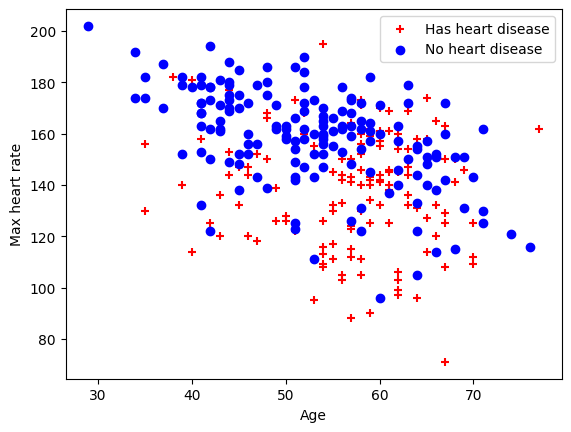

In [3]:
pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],7],c="r",marker="+", label = "Has heart disease")
plt.scatter(X[neg[:,0],0],X[neg[:,0],7],c="b",marker="o", label = "No heart disease")

plt.xlabel("Age")
plt.ylabel("Max heart rate")
#plt.ylim(,200)
plt.legend()
plt.show()

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier to the training data
clf.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the classifier
print(f"Accuracy: {accuracy}")

Accuracy: 0.7833333333333333
